## Time Series Assignment

In this assignment students have to make ARIMA model over shampoo sales
data and check the MSE between predicted and actual value.
Student can download data in .csv format from the following link:

https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-
year-period#!ds =22r0&display=line

An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


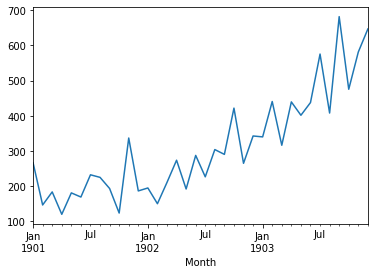

In [1]:
#Referred https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
from sklearn.metrics import mean_squared_error
 
import warnings
warnings.filterwarnings('ignore')
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

In [2]:
X=series.values
X

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [3]:
size=int(len(X)*0.60)
print(len(X))
print(size)

36
21


In [4]:
train, test = X[0:size], X[size:len(X)]

In [5]:
history=[x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=272.964514, expected=421.600000
predicted=290.313793, expected=264.500000
predicted=349.117739, expected=342.300000
predicted=306.512991, expected=339.700000
predicted=387.376389, expected=440.400000
predicted=348.154217, expected=315.900000
predicted=386.308847, expected=439.300000
predicted=356.082057, expected=401.300000
predicted=446.379488, expected=437.400000
predicted=394.737342, expected=575.500000
predicted=434.915411, expected=407.600000
predicted=507.923468, expected=682.000000
predicted=435.482882, expected=475.300000
predicted=652.743751, expected=581.300000
predicted=546.343477, expected=646.900000
Test MSE: 7547.803


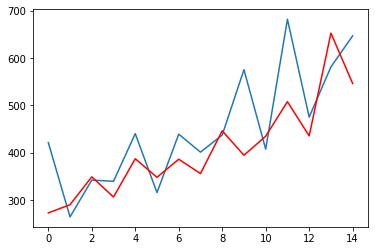

In [6]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()